<a href="https://colab.research.google.com/github/josephxlp/PyTorch100Days/blob/main/W1DAY5_Neural_Network_with_Custom_Activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W1DAY5: Neural Network with Custom Activation

Description

- implement a neural network that uses a custom activation function instead of built-in ones like ReLU or Sigmoid
- This demonstrates how PyTorch allows full flexibility in defining non-


    Goal:Use a custom-defined activation function inside a simple feedforward neural network.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Generate some synthetic data
X = torch.linspace(-3, 3, 100).unsqueeze(1)  # 100 inputs from -3 to 3
Y = torch.sin(X) + 0.1 * torch.randn(X.size())  # Target: noisy sine wave

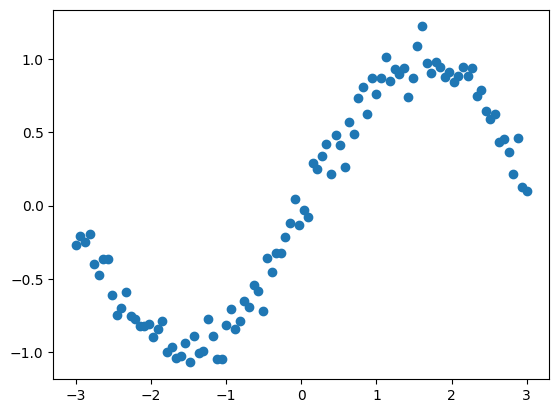

In [ ]:
plt.scatter(X.numpy(), Y.numpy())
plt.show()

In [ ]:
# Load data into a DataLoader
dataset = TensorDataset(X, Y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

In [ ]:
# Define a custom activation function
def swish(x):
    return x * torch.sigmoid(x)  # Swish: x * sigmoid(x)

In [ ]:
# Custom Swish activation as a module (for use in nn.Sequential)
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

In [ ]:
# Define a simple feedforward neural network using the Swish activation
class SwishNet(nn.Module):
    def __init__(self):
        super(SwishNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),  # Input layer
            Swish(),           # Custom activation
            nn.Linear(32, 32),
            Swish(),           # Another Swish
            nn.Linear(32, 1)   # Output layer
        )

    def forward(self, x):
        return self.net(x)

In [ ]:
model = SwishNet()

# Use Mean Squared Error loss
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(200):
    for batch_X, batch_Y in loader:
        output = model(batch_X)              # Forward pass
        loss = criterion(output, batch_Y)    # Compute MSE loss

        optimizer.zero_grad()                # Clear gradients
        loss.backward()                      # Backpropagation
        optimizer.step()                     # Update weights

    if (epoch+1) % 40 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')

Epoch 40, Loss: 0.0178
Epoch 80, Loss: 0.0117
Epoch 120, Loss: 0.0188
Epoch 160, Loss: 0.0098
Epoch 200, Loss: 0.0046
